In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from warnings import filterwarnings
filterwarnings("ignore")

%matplotlib inline
data = pd.read_csv("./cleaned.csv")
df = data

In [2]:
feature_cols = ['community', 'age', 'weight1', 'history','HB','IFA','BP1', 'res']
X = data[feature_cols] 
y = data['reslt']
from myKNN import *
weights = [0.04443233234214417, -0.024847621647369884, 0.5449535222905776, -0.07885807598072059, 0.005079960190242526, 0.16241303661498857, -0.036131885629758505, 0.09105601219402526]
base = min(weights)
Range = max(weights) - base
normalized = [(x-base)/Range for x in weights]
weights = normalized


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
kf = KFold(5, True)
kf.get_n_splits(X)
average_sk_knn = 0
average_my_knn1 = 0
average_my_knn2 = 0
average_my_knn3 = 0
average_my_knn_weighted = 0
averageSVM = 0
averageNB = 0
averageDT = 0
averageRF = 0
averageNN = 0
averageADA = 0
averageNB = 0
from sklearn.neighbors import KNeighborsClassifier
 
for i in range(10):
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        
        y_pred = myknn_eucledian(X_train,y_train,X_test,7)
        #print(y_pred)
        average_my_knn1+=metrics.accuracy_score(y_test, y_pred)
        
        y_pred = myknn_manhattan(X_train,y_train,X_test,7)
        #print(y_pred)
        average_my_knn2+=metrics.accuracy_score(y_test, y_pred)
        
        y_pred = myknn_minkowski(1,X_train,y_train,X_test,7)
        #print(y_pred)
        average_my_knn3+=metrics.accuracy_score(y_test, y_pred)
        
        y_pred = myknn_weighted(X_train,y_train,X_test,8,weights)
        #print(y_pred)
        average_my_knn_weighted+=metrics.accuracy_score(y_test, y_pred)
        
        
        #Sklearn modules for comparision of results
        clf = KNeighborsClassifier(n_neighbors=7)
        clf = clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        y_dt = y_pred
        average_sk_knn+=metrics.accuracy_score(y_test, y_pred)
        
        svclassifier = SVC(kernel='linear')
        svclassifier.fit(X_train, y_train)

        y_pred = svclassifier.predict(X_test)
        y_svm = y_pred
        averageSVM+=metrics.accuracy_score(y_test, y_pred)
        
        clf = DecisionTreeClassifier(max_depth=2)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_svm = y_pred
        averageDT+=metrics.accuracy_score(y_test, y_pred)
        
        clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_svm = y_pred
        averageRF+=metrics.accuracy_score(y_test, y_pred)
        
        clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=2000)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_svm = y_pred
        averageNN+=metrics.accuracy_score(y_test, y_pred)
        
        clf =  AdaBoostClassifier()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_svm = y_pred
        averageADA+=metrics.accuracy_score(y_test, y_pred)
       
        clf =   GaussianNB()
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_svm = y_pred
        averageNB+=metrics.accuracy_score(y_test, y_pred)
       
        
        

        


In [4]:
print("Average Accuracy SK KNN:- ",average_sk_knn/50)
print("Average Accuracy MY KNN euc:- ",average_my_knn1/50)
print("Average Accuracy MY KNN man:- ",average_my_knn2/50)
print("Average Accuracy MY KNN min:- ",average_my_knn3/50)
print("Average Accuracy MY KNN weighted:- ",average_my_knn_weighted/50)
print("Average Accuracy SVM:- ",averageSVM/50)
print("Average Accuracy NB:- ",averageNB/50)
print("Average Accuracy DT:- ",averageDT/50)
print("Average Accuracy RF:- ",averageRF/50)
print("Average Accuracy NN:- ",averageNN/50)
print("Average Accuracy ADA:- ",averageADA/50)
print("Average Accuracy NB:- ",averageNB/50)



Average Accuracy SK KNN:-  0.9009523809523812
Average Accuracy MY KNN euc:-  0.878
Average Accuracy MY KNN man:-  0.878
Average Accuracy MY KNN min:-  0.878
Average Accuracy MY KNN weighted:-  0.910857142857143
Average Accuracy SVM:-  0.8968571428571428
Average Accuracy NB:-  0.7206666666666663
Average Accuracy DT:-  0.8830476190476191
Average Accuracy RF:-  0.8385238095238097
Average Accuracy NN:-  0.7905714285714288
Average Accuracy ADA:-  0.8185238095238095
Average Accuracy NB:-  0.7206666666666663


Text(0.5, 1.0, 'Algorithm')

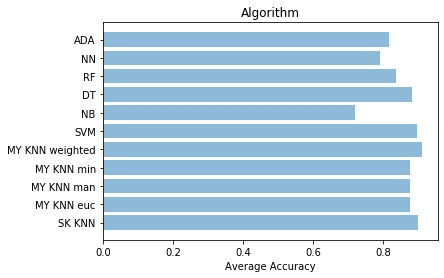

In [11]:
objects = ('SK KNN', 'MY KNN euc', 'MY KNN man', 'MY KNN min', 'MY KNN weighted', 'SVM', 'NB', 'DT', 'RF', 'NN', 'ADA')
y_pos = np.arange(len(objects))
performance = [average_sk_knn/50 , average_my_knn1/50, average_my_knn2/50, average_my_knn3/50, average_my_knn_weighted/50, averageSVM/50, averageNB/50, averageDT/50, averageRF/50, averageNN/50, averageADA/50]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Average Accuracy')
plt.title('Algorithm')